Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 4 - Pré-Processamento de Dados - Parte 2

Nome: Wilson Castello Branco Neto

**Dataset**: Salary dataset based on country and race

Disponível em: https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race


#**Parte 0** - Carregamento e limpeza do dataset

Limpeza dos dados conforme conteúdo apresentado na aula 3.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv('datasets\\atv4.csv')
df.drop('Unnamed: 0',axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
li = df['Salary'].mean() - 2 * df['Salary'].std()
ls = df['Salary'].mean() + 2 * df['Salary'].std()
df = df[(df['Salary']>=li) & (df['Salary']<=ls)]
df = df[(df['Age'] - df['Years of Experience'])>=16]
df = df[(df['Gender']=='Male') | (df['Gender']=='Female')]
df.loc[df['Education Level'] == 'phD', 'Education Level'] = 'PhD'
df.loc[df['Education Level'] == "Bachelor's Degree", 'Education Level'] = "Bachelor's"
df.loc[df['Education Level'] == "Master's Degree",'Education Level'] = "Master's"
# Os nomes das colunas com espaços em branco foram alterados para simplificar
df.rename({'Education Level': 'Education'}, axis=1, inplace=True)
df.rename({'Years of Experience': 'Experience'}, axis=1, inplace=True)
# A coluna Job Title foi excluída em função da falta de padronização dos seus valores
df.drop('Job Title',axis='columns', inplace=True)
df

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,5.0,90000.0,UK,White
1,28.0,Female,Master's,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's,4.0,55000.0,China,Chinese


In [2]:
df.describe(include="all")

,Age,Gender,Education,Experience,Salary,Country,Race
count,5118.000000,5118,5118,5118.000000,5118.000000,5118,5118
unique,NaN,2,4,NaN,NaN,5,10
top,NaN,Male,Bachelor's,NaN,NaN,USA,White
freq,NaN,2779,2251,NaN,NaN,1069,1504
mean,33.929660,NaN,NaN,8.265631,113722.941579,NaN,NaN
std,7.703118,NaN,NaN,6.165074,51858.887848,NaN,NaN
min,21.000000,NaN,NaN,0.000000,25000.000000,NaN,NaN
25%,28.000000,NaN,NaN,3.000000,68118.000000,NaN,NaN
50%,32.000000,NaN,NaN,7.000000,110707.000000,NaN,NaN
75%,39.000000,NaN,NaN,12.000000,160000.000000,NaN,NaN


#**Parte 1** - Transformação: Padronização e Codificação de variáveis numéricas

Faz uma cópia do dataframe para que o dataframe original seja mantido para as outras partes do exemplo.

In [3]:
df2 = df.copy()

Padronização de valores categóricos

In [4]:
df2['Country'] = df2['Country'].str.upper()
df2['Gender'] = df2['Gender'].str.lower()

df2

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,male,Bachelor's,5.0,90000.0,UK,White
1,28.0,female,Master's,3.0,65000.0,USA,Hispanic
2,45.0,male,PhD,15.0,150000.0,CANADA,White
3,36.0,female,Bachelor's,7.0,60000.0,USA,Hispanic
4,52.0,male,Master's,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...
6698,37.0,male,Bachelor's,6.0,75000.0,CANADA,Asian
6699,49.0,female,PhD,20.0,200000.0,UK,Mixed
6700,32.0,male,High School,3.0,50000.0,AUSTRALIA,Australian
6701,30.0,female,Bachelor's,4.0,55000.0,CHINA,Chinese


Mapeamento direto usando a classe **LabelEncoder**

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2['Gender']=le.fit_transform(df2['Gender'])
df2['Education']=le.fit_transform(df2['Education'])
df2['Country']=le.fit_transform(df2['Country'])
df2['Race']=le.fit_transform(df2['Race'])

Visualização do datraframe original e do dataframe convertido com o LabelEncoder

In [6]:
df

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,5.0,90000.0,UK,White
1,28.0,Female,Master's,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's,4.0,55000.0,China,Chinese


In [7]:
df2

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


Treinamento de um modelo de regressão linear com todos os atributos e apresentação do r2 obtido após a codificação com o LabelEncoder.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df2.drop(['Salary'] ,axis='columns')
y = df2['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6607095299161199


Representação binária usando a função **get_dummies** do Pandas.

A biblioteca scikit-learn disponibiliza a classe OneHotEncoder que realiza a mesma tarefa. Embora possua algumas vantagens, o uso do OneHotEncoder é mais trabalhoso e não será apresentado neste notebook.

In [9]:
df3 = df.copy()
df3 = pd.get_dummies(df3, columns = ['Gender','Education','Country','Race'])
df3

,Age,Experience,Salary,Gender_Female,Gender_Male,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,Country_Australia,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,5.0,90000.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,28.0,3.0,65000.0,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,45.0,15.0,150000.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,36.0,7.0,60000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,52.0,20.0,200000.0,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,37.0,6.0,75000.0,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6699,49.0,20.0,200000.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6700,32.0,3.0,50000.0,False,True,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
6701,30.0,4.0,55000.0,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Treinamento de um modelo de regressão linear com todos os atributos e apresentação do r2 obtido após a codificação com o get_dummies.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df3.drop(['Salary'] ,axis='columns')
y = df3['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.69813088328833


#**Parte 2** - Transformação: Normalização

Utiliza o df2 que possui os atributos categóricos transformados em numéricos por meio do **labelEncoder**

In [11]:
df2

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


Método MinMax

In [12]:
from sklearn.preprocessing import MinMaxScaler

#O parâmetro passado no construtor define os limites mínimos e máximos a serem
#usados, por meio de uma tupla. Se for deixado em branco, o valor padrão é (0, 1)

transform = MinMaxScaler((0,1))
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df2['Idade MinMax'] = transform.fit_transform(df2['Age'].values.reshape(-1,1))
df2['xP MinMax'] = transform.fit_transform(df2['Experience'].values.reshape(-1,1))

df2

,Age,Gender,Education,Experience,Salary,Country,Race,Idade MinMax,xP MinMax
0,32.0,1,0,5.0,90000.0,3,9,0.268293,0.147059
1,28.0,0,2,3.0,65000.0,4,5,0.170732,0.088235
2,45.0,1,3,15.0,150000.0,1,9,0.585366,0.441176
3,36.0,0,0,7.0,60000.0,4,5,0.365854,0.205882
4,52.0,1,2,20.0,200000.0,4,1,0.756098,0.588235
...,...,...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1,0.390244,0.176471
6699,49.0,0,3,20.0,200000.0,3,7,0.682927,0.588235
6700,32.0,1,1,3.0,50000.0,0,2,0.268293,0.088235
6701,30.0,0,0,4.0,55000.0,2,4,0.219512,0.117647


Crie o histograma de frequência para os variáveis Idade (Age) e Idade MinMax Pesquise como apresentar os dois gráficos na mesma figura. Em seguida, treine um modelo de regressão linear e apresente o r2 obtido, substituindo os atributos idade (Age) e tempo de experiência originais pelos atributos resultantes da transformação MinMax. Compare se há diferença no resultado gerado por modelo com o gerado pelo modelo treinado com os parâmetros originais.

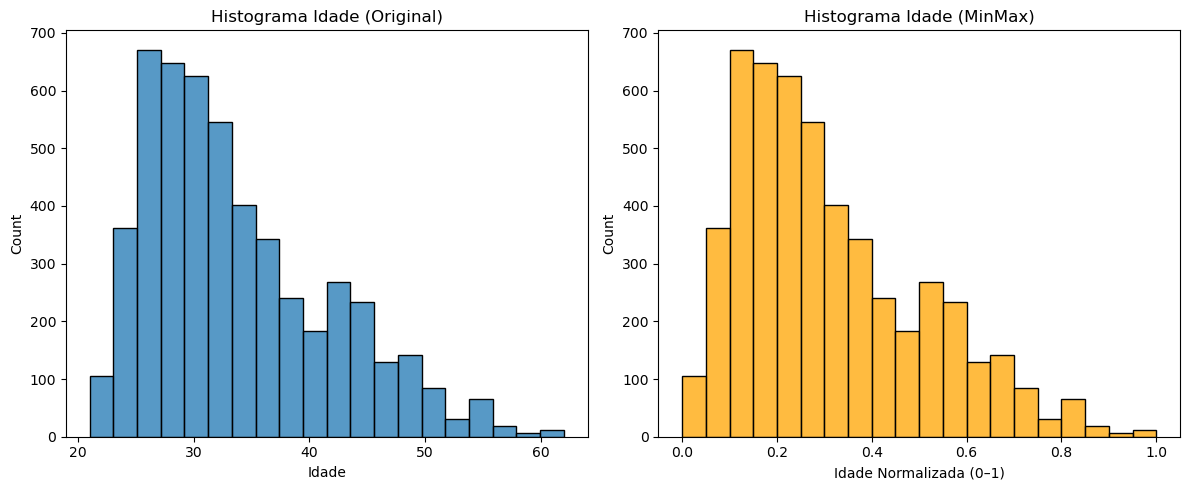

In [13]:
# Histogramas lado a lado (Age original x Age MinMax)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age original
sns.histplot(df2['Age'], bins=20, kde=False, ax=axes[0])
axes[0].set_title("Histograma Idade (Original)")
axes[0].set_xlabel("Idade")

# Age normalizado
sns.histplot(df2['Idade MinMax'], bins=20, kde=False, ax=axes[1], color="orange")
axes[1].set_title("Histograma Idade (MinMax)")
axes[1].set_xlabel("Idade Normalizada (0–1)")

plt.tight_layout()
plt.show()

In [18]:
# Regressão Linear com variáveis originais
X_original = df2[['Age', 'Experience']]
y = df2['Salary']

model_original = LinearRegression()
model_original.fit(X_original, y)

y_pred_original = model_original.predict(X_original)
r2_original = r2_score(y, y_pred_original)

print("R² com atributos originais:", r2_original)
print("Coeficientes:", model_original.coef_)
print("Intercepto:", model_original.intercept_)

R² com atributos originais: 0.662060560228753
Coeficientes: [-1153.9521616  8175.2600273]
Intercepto: 85302.46252471613


In [19]:
# Regressão Linear com variáveis MinMax
X_minmax = df2[['Idade MinMax', 'xP MinMax']]

model_minmax = LinearRegression()
model_minmax.fit(X_minmax, y)

y_pred_minmax = model_minmax.predict(X_minmax)
r2_minmax = r2_score(y, y_pred_minmax)

print("R² com atributos MinMax:", r2_minmax)
print("Coeficientes:", model_minmax.coef_)
print("Intercepto:", model_minmax.intercept_)

R² com atributos MinMax: 0.6620605602287531
Coeficientes: [-47312.03862562 277958.84092808]
Intercepto: 61069.46713110717


In [20]:
# Comparação final
print(f"R² Original : {r2_original:.4f}")
print(f"R² MinMax   : {r2_minmax:.4f}")

if abs(r2_original - r2_minmax) < 1e-6:
    print("O R^2 não muda, pois a regressão linear é invariante a escalas lineares.")
else:
    print("Há uma pequena diferença no R², possivelmente por arredondamentos.")

R² Original : 0.6621
R² MinMax   : 0.6621
O R^2 não muda, pois a regressão linear é invariante a escalas lineares.


Método Interquartil ou Robusto



In [22]:
from sklearn.preprocessing import RobustScaler

transform = RobustScaler()
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df2['Idade Robust'] = transform.fit_transform(df2['Age'].values.reshape(-1,1))
df2['xP Robust'] = transform.fit_transform(df2['Experience'].values.reshape(-1,1))
df2

,Age,Gender,Education,Experience,Salary,Country,Race,Idade MinMax,xP MinMax,Idade Robust,xP Robust
0,32.0,1,0,5.0,90000.0,3,9,0.268293,0.147059,0.000000,-0.222222
1,28.0,0,2,3.0,65000.0,4,5,0.170732,0.088235,-0.363636,-0.444444
2,45.0,1,3,15.0,150000.0,1,9,0.585366,0.441176,1.181818,0.888889
3,36.0,0,0,7.0,60000.0,4,5,0.365854,0.205882,0.363636,0.000000
4,52.0,1,2,20.0,200000.0,4,1,0.756098,0.588235,1.818182,1.444444
...,...,...,...,...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1,0.390244,0.176471,0.454545,-0.111111
6699,49.0,0,3,20.0,200000.0,3,7,0.682927,0.588235,1.545455,1.444444
6700,32.0,1,1,3.0,50000.0,0,2,0.268293,0.088235,0.000000,-0.444444
6701,30.0,0,0,4.0,55000.0,2,4,0.219512,0.117647,-0.181818,-0.333333


Crie o histograma de frequência para os variáveis Idade (Age) e Idade Robust na mesma figura. Em seguida, treine um modelo de regressão linear e apresente o r2 obtido, substituindo os atributos idade (Age) e tempo de experiência originais pelos atributos resultantes da transformação Robust. Compare se há diferença no resultado gerado por modelo com o gerado pelo modelo treinado com os parâmetros originais.

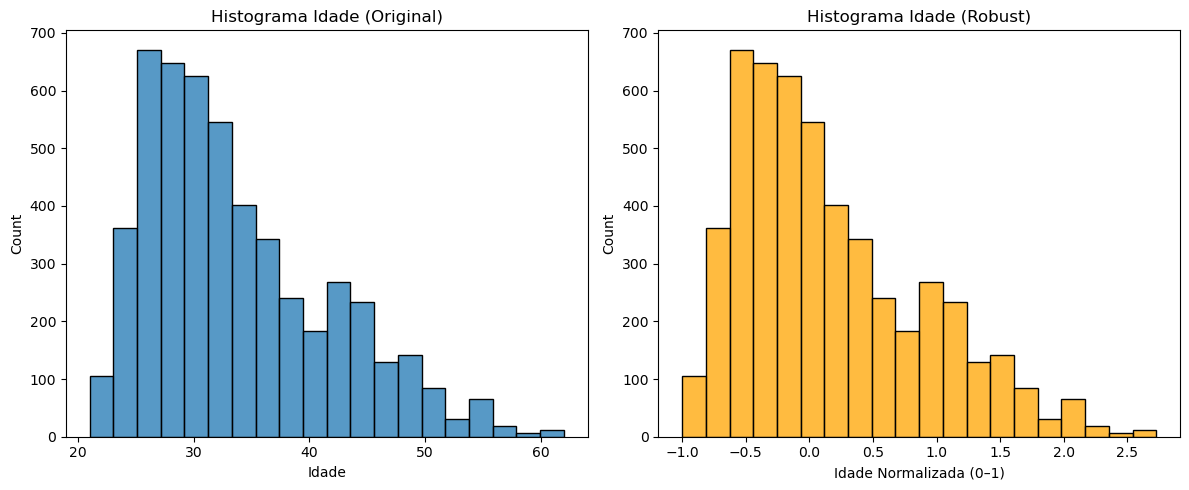

In [25]:
# Histogramas lado a lado (Age original x Age MinMax)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age original
sns.histplot(df2['Age'], bins=20, kde=False, ax=axes[0])
axes[0].set_title("Histograma Idade (Original)")
axes[0].set_xlabel("Idade")

# Age normalizado
sns.histplot(df2['Idade Robust'], bins=20, kde=False, ax=axes[1], color="orange")
axes[1].set_title("Histograma Idade (Robust)")
axes[1].set_xlabel("Idade Normalizada (0–1)")

plt.tight_layout()
plt.show()

In [26]:
X_original = df2[['Age', 'Experience']]
y = df2['Salary']

model_original = LinearRegression()
model_original.fit(X_original, y)

y_pred_original = model_original.predict(X_original)
r2_original = r2_score(y, y_pred_original)

print("R² com atributos originais:", r2_original)
print("Coeficientes:", model_original.coef_)
print("Intercepto:", model_original.intercept_)

R² com atributos originais: 0.662060560228753
Coeficientes: [-1153.9521616  8175.2600273]
Intercepto: 85302.46252471613


In [27]:
X_minmax = df2[['Idade Robust', 'xP Robust']]

model_robust = LinearRegression()
model_robust.fit(X_minmax, y)

y_pred_minmax = model_robust.predict(X_minmax)
r2_robust = r2_score(y, y_pred_minmax)

print("R² com atributos Robust:", r2_robust)
print("Coeficientes:", model_robust.coef_)
print("Intercepto:", model_robust.intercept_)

R² com atributos Robust: 0.6620605602287531
Coeficientes: [-12693.4737776   73577.34024567]
Intercepto: 105602.81354457843


In [28]:
print(f"R² Original : {r2_original:.4f}")
print(f"R² Robust   : {r2_robust:.4f}")

if abs(r2_original - r2_robust) < 1e-6:
    print("O R^2 não muda, pois a regressão linear é invariante a escalas lineares.")
else:
    print("Há uma pequena diferença no R², possivelmente por arredondamentos.")

R² Original : 0.6621
R² Robust   : 0.6621
O R^2 não muda, pois a regressão linear é invariante a escalas lineares.


Método z-score

In [ ]:
from sklearn.preprocessing import StandardScaler

transform = StandardScaler()
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df2['Idade z_score'] = transform.fit_transform(df2['Age'].values.reshape(-1,1))
df2['xP z_score'] = transform.fit_transform(df2['Experience'].values.reshape(-1,1))
df2

,Age,Gender,Education,Experience,Salary,Country,Race,Idade MinMax,xP MinMax,Idade Robust,xP Robust,Idade z_score,xP z_score
0,32.0,1,0,5.0,90000.0,3,9,0.268293,0.147059,0.000000,-0.222222,-0.250528,-0.529750
1,28.0,0,2,3.0,65000.0,4,5,0.170732,0.088235,-0.363636,-0.444444,-0.769849,-0.854190
2,45.0,1,3,15.0,150000.0,1,9,0.585366,0.441176,1.181818,0.888889,1.437265,1.092449
3,36.0,0,0,7.0,60000.0,4,5,0.365854,0.205882,0.363636,0.000000,0.268793,-0.205311
4,52.0,1,2,20.0,200000.0,4,1,0.756098,0.588235,1.818182,1.444444,2.346077,1.903548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1,0.390244,0.176471,0.454545,-0.111111,0.398623,-0.367530
6699,49.0,0,3,20.0,200000.0,3,7,0.682927,0.588235,1.545455,1.444444,1.956586,1.903548
6700,32.0,1,1,3.0,50000.0,0,2,0.268293,0.088235,0.000000,-0.444444,-0.250528,-0.854190
6701,30.0,0,0,4.0,55000.0,2,4,0.219512,0.117647,-0.181818,-0.333333,-0.510189,-0.691970


Crie o histograma de frequência para os variáveis Idade (Age) e Idade z-score na mesma figura. Em seguida, treine um modelo de regressão linear e apresente o r2 obtido, substituindo os atributos idade (Age) e tempo de experiência originais pelos atributos resultantes da transformação z-score. Compare se há diferença no resultado gerado por modelo com o gerado pelo modelo treinado com os parâmetros originais.

In [ ]:
# Mesma coisa que a anterior

#**Parte 3** - Seleção de atributos usando a abordagem de Filtro com a escolha dos atributos por meio do ganho de informação

Crie uma cópia do dataframe original chamada df4 e realize a codificação dos valores categóricos usando a classe LabelEncoder. Em seguida, apresente o dataframe gerado.

In [29]:
df4 = df.copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5118 entries, 0 to 6702
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5118 non-null   float64
 1   Gender      5118 non-null   object 
 2   Education   5118 non-null   object 
 3   Experience  5118 non-null   float64
 4   Salary      5118 non-null   float64
 5   Country     5118 non-null   object 
 6   Race        5118 non-null   object 
dtypes: float64(3), object(4)
memory usage: 319.9+ KB


In [30]:
categorical_cols = df4.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df4[col] = le.fit_transform(df4[col])
df4.head()

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1


Treine um modelo de regressão linear com todos os atributos e apresente o r2 para fins de comparação posterior.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# X = todos os atributos exceto Salary
X = df4.drop(columns=['Salary'])
y = df4['Salary']

# Treinar modelo
model = LinearRegression()
model.fit(X, y)

# Previsões e cálculo do R²
y_pred = model.predict(X)
r2_all = r2_score(y, y_pred)

print("R² com todos os atributos:", r2_all)

R² com todos os atributos: 0.6830305115445867


Criação de uma árvore de regressão para calcular o ganho de informação de cada um dos atributos

In [32]:
from sklearn.tree import DecisionTreeRegressor

X = df4.drop(['Salary'] ,axis='columns')
y = df4['Salary']
modelo = DecisionTreeRegressor(criterion='squared_error', max_depth=7, random_state=42)
modelo.fit(X, y)
print(modelo.feature_names_in_)
print(modelo.feature_importances_)

['Age' 'Gender' 'Education' 'Experience' 'Country' 'Race']
[7.52041872e-02 1.33735955e-02 4.10627674e-02 8.69049435e-01
 1.06788300e-03 2.42132233e-04]


Considerando o ganho de informação pode-se definir a seguinte ordem de importância dos atributos.

1.   Tempo de experiência (0.869)
2.   Idade (0.075)
3.   Nível educacional (0.041)
4.   Gênero (0.013)
5.   País (0.001)
6.   Raça (0.000)

Dois critérios podem ser escolhidos para definir quais atributos farão parte do modelo:
1.  Uma quantidade fixa de atributos.
2.  Todos os atributos cujo ganho de informação seja superior a um limite pré-estabelecido.

Neste exemplo, serão selecionados os três atributos com maior ganho de informação (50% da quantidade de atributos no dataset original).

Treine um modelo de regressão linear com os três atributos com maior ganho de informação, apresente o r2 e conclua se a exclusão dos demais atributos foi positiva ou não.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Seleção dos 3 atributos com maior ganho de informação
X_top3 = df4[['Experience', 'Age', 'Education']]
y = df4['Salary']

# Treinar o modelo
model_top3 = LinearRegression()
model_top3.fit(X_top3, y)

# Previsões e cálculo do R²
y_pred_top3 = model_top3.predict(X_top3)
r2_top3 = r2_score(y, y_pred_top3)

print("R² com os 3 atributos mais importantes:", r2_top3)

R² com os 3 atributos mais importantes: 0.678075299114057


Crie outra cópia do dataframe original chamada df5 e realize a codificação dos valores categóricos usando o método get_dummies. Em seguida, apresente o dataframe gerado.

In [ ]:
df5 = df.copy()
df5 = pd.get_dummies(df5, columns = ['Gender','Education','Country','Race'])
df5

,Age,Experience,Salary,Gender_Female,Gender_Male,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,Country_Australia,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,5.0,90000.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,28.0,3.0,65000.0,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,45.0,15.0,150000.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,36.0,7.0,60000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,52.0,20.0,200000.0,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,37.0,6.0,75000.0,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6699,49.0,20.0,200000.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6700,32.0,3.0,50000.0,False,True,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
6701,30.0,4.0,55000.0,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Treine um modelo com todos os atributos gerados e apresente o r2 para posterior comparação.

Treinamento da árvore de decisão e apresentação da "importância" de cada atributo após a codificação com o get_dummies.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df5.drop(['Salary'] ,axis='columns')
y = df5['Salary']
modelo = DecisionTreeRegressor(criterion='squared_error', max_depth=7, random_state=42)
modelo.fit(X, y)
print(modelo.feature_names_in_)
print(modelo.feature_importances_)

['Age' 'Experience' 'Gender_Female' 'Gender_Male' "Education_Bachelor's"
 'Education_High School' "Education_Master's" 'Education_PhD'
 'Country_Australia' 'Country_Canada' 'Country_China' 'Country_UK'
 'Country_USA' 'Race_African American' 'Race_Asian' 'Race_Australian'
 'Race_Black' 'Race_Chinese' 'Race_Hispanic' 'Race_Korean' 'Race_Mixed'
 'Race_Welsh' 'Race_White']
[0.07  0.866 0.003 0.004 0.014 0.019 0.012 0.008 0.    0.    0.    0.
 0.001 0.    0.    0.    0.    0.001 0.    0.    0.    0.    0.   ]


Treine um modelo de regressão linear com todos os atributos com ganho de informação superior a 0.001, apresente o r2 e conclua se a exclusão dos demais atributos foi positiva ou não, são eles:

1.   Idade (0.07)
2.   Tempo de Experiência (0.866)
3.   Gender_Female (0.003)
4.   Gender_Male (0.004)
5.   Education_Bachelor's (0.014)
6.   Education_High School (0.019)
7.   Education_Master's (0.012)
8.   Education_PhD (0.008)


#**Parte 4** Seleção de atributos usando a abordagem de Filtro com base em medidas clássicas de correlação e aspectos subjetivos.

Crie uma cópia do dataframe original chamada df6 e apresente o dataframe gerado.

Cálcule o coeficiente de correlação (pearson) entre todas as variáveis quantitativas e apresente o mapa de calor.

Apresente os diagramas de dispersão para mostrar as relações entre as variáveis quantitativas.

*   Tempo de Experiência e Salário.
*   Idade - Salário
*   Idade - Tempo de Experiência



O que se pode concluir a partir destes gráficos?

Para varivéis qualitativas, é possível gerar histogramas de frequência para cada classe para analisar se há diferenças significativas entre os histogramas. Além disto, é possível gerar gráficos de colunas ou barras com os valores médios e boxplots para analisar a variância dos valores em cada classe.

Análise do impacto do atributo **gênero** no atributo **salário**.


Apresente a tabela, o gráfico de barras e o box plot com o salário médio por gênero

Apresente o histograma de frequência do salário de cada gênero.


O que se pode concluir a partir destes gráficos?

Análise do impacto do atributo **nível educacional** no atributo **salário**.

Apresente a tabela, o gráfico de barras e o box plot com o salário médio por nível educacional.

O que se pode concluir a partir destes gráficos?

Análise do impacto do atributo **país** no atributo **salário**.

Apresente a tabela, o gráfico de barras e o box plot com o salário médio por país.

Criação de histogramas de frequência do atributo salário, separados por país para facilitar a visualização.

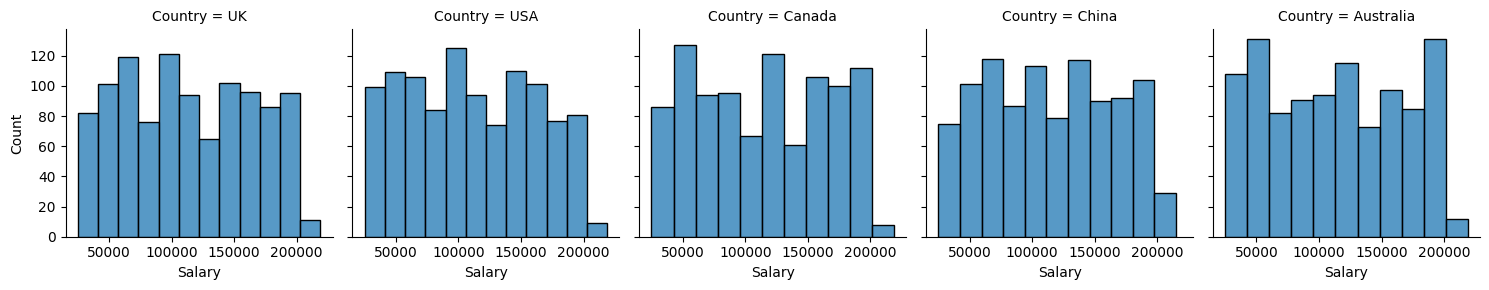

In [ ]:
grafico = sns.FacetGrid(df6, col = "Country")
grafico.map(sns.histplot, "Salary")
plt.show ()

O que se pode concluir a partir destes gráficos?

Análise do impacto do atributo **raça** no atributo **salário**.

Apresente a tabela, o gráfico de barras e o box plot com o salário médio por raça.

Apresente o histograma de frequência do salário por raça.

Apresente os histogramas de frequência do atributo salário, separados por raça para facilitar a visualização.

O que se pode concluir a partir destes gráficos?

Considerando os resultados apresentados, subjetivamente, quais atributos devem e quais atributos não devem fazer parte do modelo?


Codifique os atributos categóricos por meio da classe LabelEncoder e treine três modelos. O primeiro deve considerar todos os atributos disponíveis, o segundo apenas os atributos selecionados acima e o terceiro deve retirar o atributo gênero (usar apenas Tempo de Experiência e a Escolaridade). Por fim, compare os resultados e conclua se a exclusão dos atributos foi positiva ou não.

#**Parte 5** Seleção de atributos usando a abordagem de Wrapper com base em medidas de ganho de informação.

Crie uma cópia do dataframe original chamada df7, realize a codificação dos atributos categóricos utilizando o LabelEncoder e apresente o dataframe gerado.
Por fim, treine um modelo com todos os atributos e apresente o r2 para comparações futuras.

Cálcule o ganho de informação de todos os atributos utilizando uma árvore de regressão.

Criação e avaliação dos modelos, utilzando o método forward.

Crie um modelo apenas com o atributo tempo de experiência

Crie um modelo apenas com os atributos tempo de experiência e idade

Como o incremento no resultado foi baixo, pode-se concluir que não vale a pena incluir outros atributos no modelo. Mas sabe-se que isto ocorreu porque os atributos idade e experiência tem alta correlação. A inclusão do próximo atributo conforme seu ganho de informação (nível educacional) pode melhorar os resultados, mas tal informação não estaria disponível se fosse usado apenas o ganho de informação.

Crie um modelo apenas com os atributos tempo de experiência, idade e nível educacional. Houve melhora com a inclusão do novo atributo?

#**Parte 6** Seleção de atributos usando a abordagem de Filtro com base no método selectKBest

In [ ]:
df8 = df.copy()
le = LabelEncoder()
df8['Gender']=le.fit_transform(df8['Gender'])
df8['Education']=le.fit_transform(df8['Education'])
df8['Country']=le.fit_transform(df8['Country'])
df8['Race']=le.fit_transform(df8['Race'])
df8

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


O método selectKbest seleciona os k atributos mais relevantes, conforme o resultado de testes estatísticos.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

seletor = SelectKBest(score_func=f_regression, k=3)

X = df8.drop(['Salary'] ,axis='columns')
y = df8['Salary']
seletor.fit_transform(X,y)

print('Todos os campos')
print(X.columns)

print('Campos selecionados')
filter = seletor.get_support()
print(X.columns[filter])

Todos os campos
Index(['Age', 'Gender', 'Education', 'Experience', 'Country', 'Race'], dtype='object')
Campos selecionados
Index(['Age', 'Education', 'Experience'], dtype='object')


Treinamento do modelo com todos os atributos para comparação.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df8.drop(['Salary'] ,axis='columns')
y = df8['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6607095299161199


Treinamento do modelo com os atributos idade, nível educacional e tempo de experiência.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df8.drop(['Salary','Race','Country','Gender'] ,axis='columns')
y = df8['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6565173393835537


#**Parte 7** Seleção de atributos usando a abordagem Wrapper com base na classe RFE.

In [ ]:
df9 = df.copy()
le = LabelEncoder()
df9['Gender']=le.fit_transform(df9['Gender'])
df9['Education']=le.fit_transform(df9['Education'])
df9['Country']=le.fit_transform(df9['Country'])
df9['Race']=le.fit_transform(df9['Race'])
df9

,Age,Gender,Education,Experience,Salary,Country,Race
0,32.0,1,0,5.0,90000.0,3,9
1,28.0,0,2,3.0,65000.0,4,5
2,45.0,1,3,15.0,150000.0,1,9
3,36.0,0,0,7.0,60000.0,4,5
4,52.0,1,2,20.0,200000.0,4,1
...,...,...,...,...,...,...,...
6698,37.0,1,0,6.0,75000.0,1,1
6699,49.0,0,3,20.0,200000.0,3,7
6700,32.0,1,1,3.0,50000.0,0,2
6701,30.0,0,0,4.0,55000.0,2,4


In [ ]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df9.drop(['Salary'] ,axis='columns')
y = df9['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

estimator =  linear_model.LinearRegression()
seletor = RFE(estimator, n_features_to_select=3, step=1)
seletor.fit(X, y)

print(X.columns)
print(seletor.ranking_)

Index(['Age', 'Gender', 'Education', 'Experience', 'Country', 'Race'], dtype='object')
[2 1 1 1 3 4]


Treinamento do modelo com os campos sugeridos pelo RFE (Gênero, Nível Educacional e Experiência).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

X = df9.drop(['Salary','Age','Race','Country'] ,axis='columns')
y = df9['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.6512733735104881
